# 02. Neural Network Classification with Pytorch

## 1. Make classification data and get it ready

In [184]:
import sklearn
from sklearn.datasets import make_circles

In [185]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [186]:
len(X), len(X)

(1000, 1000)

In [187]:
print(f'First 5 samples of X: \n {X[:5]}')
print(f'First 5 samples of y: \n {y[:5]}')
#binary classification and alread numerical 2 features of x to 1 label of y

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


## visualize data

In [188]:
df_X = X.T
df_X[0].shape

(1000,)

In [189]:
# make df of data
import pandas as pd

circles_df = pd.DataFrame({"feature1":df_X[0], "feature2":df_X[1], "target":y})
circles_df.head(10)


,feature1,feature2,target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


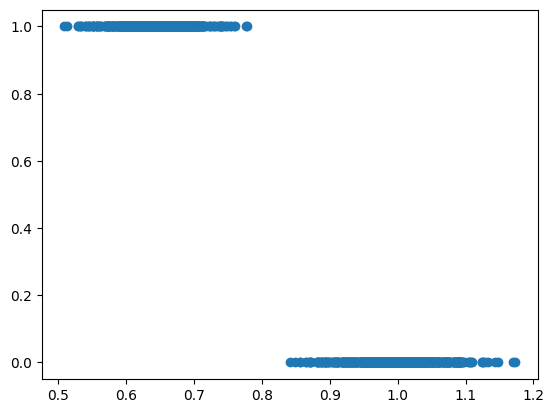

In [190]:
import matplotlib.pyplot as plt
plt.scatter((abs(circles_df['feature1']**2)+(circles_df["feature2"]**2)), circles_df['target'])

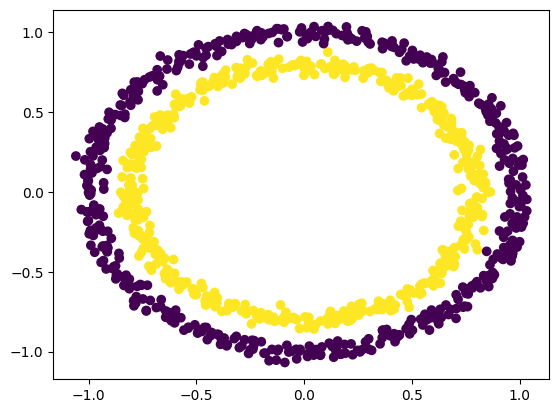

In [191]:
plt.scatter(circles_df['feature1'], circles_df['feature2'], c=y)
# blue dot vs red dot

the data we are working with is a toy dataset something we can expironment on

## 1.2 turn data into tensors and create train and test splits

In [192]:
import torch

X, y = torch.tensor(X, dtype=torch.float), torch.tensor(y, dtype=torch.float).unsqueeze(dim=1)

X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],


In [193]:
# train test split
split = int(len(X)*.8)

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(X_test)

(800, 200)

In [194]:
X.type()

'torch.FloatTensor'

## 2. Build the model

1. set device for agnostic code
2. contruct a model (subclass nn.model)
3. define loss/optim
4. create a training/test loop

In [195]:
import torch
from torch import nn
device = 'gpu' if torch.cuda.is_available() else "cpu"

In [196]:
# subclass

class logisticRegress(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=2, out_features=8)
        self.layer2 = nn.Linear(in_features=8, out_features=1)
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        out1 = self.layer1(X)
        return self.layer2(out1)
        

In [197]:
model_02 = logisticRegress().to(device)
model_02(X)

tensor([[-3.8180e-02],
        [ 5.7206e-01],
        [ 6.0159e-01],
        [ 5.5205e-01],
        [-1.8204e-01],
        [ 5.8385e-01],
        [ 4.2053e-01],
        [-6.5695e-02],
        [ 9.7789e-02],
        [ 5.1841e-01],
        [ 3.5543e-01],
        [ 1.8766e-01],
        [ 4.7070e-01],
        [-1.6684e-01],
        [-1.7302e-01],
        [-4.4703e-02],
        [ 5.2681e-01],
        [-1.7262e-02],
        [ 5.3633e-01],
        [ 3.0642e-01],
        [ 6.7954e-02],
        [ 6.6132e-01],
        [-1.3120e-02],
        [-2.0768e-02],
        [ 7.0954e-01],
        [ 6.5860e-01],
        [ 3.3826e-01],
        [-1.6159e-01],
        [-7.2870e-02],
        [-1.6714e-01],
        [ 1.3156e-01],
        [ 5.5419e-01],
        [ 4.0653e-01],
        [-1.9581e-01],
        [-2.0411e-03],
        [ 7.1517e-01],
        [ 5.9507e-01],
        [ 2.0663e-01],
        [-7.0518e-02],
        [ 6.5100e-02],
        [ 2.8073e-01],
        [ 2.9659e-01],
        [ 3.5253e-01],
        [-1

In [198]:
#We can replicate model above with sequential
"""
model_0 = nn.Sequential(
 nn.Linear(in_features=2, out_features=8),
 nn.Linear(in_features=8, out_features=1)    
).to(device)"""

'\nmodel_0 = nn.Sequential(\n nn.Linear(in_features=2, out_features=8),\n nn.Linear(in_features=8, out_features=1)    \n).to(device)'

In [199]:
model_02.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.7023, -0.7034],
                      [ 0.6552, -0.5590],
                      [ 0.5811, -0.3949],
                      [ 0.3265, -0.5964],
                      [ 0.5895, -0.6218],
                      [-0.1820, -0.6423],
                      [ 0.1711, -0.4601],
                      [-0.3504, -0.5327]])),
             ('layer1.bias',
              tensor([ 0.2432,  0.3965, -0.1385, -0.0930, -0.3374, -0.0825,  0.5864,  0.2965])),
             ('layer2.weight',
              tensor([[ 0.3468, -0.2804, -0.1159, -0.2739,  0.0540, -0.0191,  0.0818, -0.3373]])),
             ('layer2.bias', tensor([0.2739]))])

In [200]:
untrained_pred = model_02(X_train.to(device))
len(untrained_pred)

800

In [201]:
# pick loss fuction

loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(params=model_02.parameters(), lr= .01)

In [293]:
def measure_ac(y_pred, y_truth):
    #calc correct, sum to get num, item to extract number
    correct = torch.eq(y_pred.squeeze(), y_truth.squeeze()).sum().item()
    print(correct)
    print(len(y_pred))
    #devide
    return correct/len(y_pred)

In [212]:
# training loop!
epochs = 100 

epoch_num = []
loss_list  = []
test_loss_list =[]

train_ac = []
test_ac = []


for epoch in range(epochs):
    
    model_02.train()
    # forward pass
    y_pred_logits = model_02(X_train)
    y_pred = torch.round(torch.sigmoid(y_pred_logits))
    
    # calc loss
    loss = loss_fn(y_pred_logits, y_train)
    
    # zero grad
    optim.zero_grad()
    
    # back prop
    loss.backward()
    
    # optimize 
    optim.step()
    
    if epoch % 10 == 0: 
        model_02.eval()
        with torch.inference_mode():
            y_pred_log_test = model_02(X_test)
            y_pred_test = torch.round(torch.sigmoid(y_pred_log_test))

            test_loss = loss_fn(y_pred_log_test, y_test)
            print(f'Epoch {epoch} || Loss {loss} || Test Loss {test_loss}')
            epoch_num.append(epoch)
            loss_list.append(loss)
            test_loss_list.append(test_loss)
            train_ac.append(measure_ac(y_pred, y_train))
            test_ac.append(measure_ac(y_pred_test, y_test))

Epoch 0 || Loss 0.6924728155136108 || Test Loss 0.6994684338569641
torch.Size([200, 1])
Epoch 10 || Loss 0.6924729347229004 || Test Loss 0.6994875073432922
torch.Size([200, 1])
Epoch 20 || Loss 0.6924728155136108 || Test Loss 0.6993901133537292
torch.Size([200, 1])
Epoch 30 || Loss 0.6924728155136108 || Test Loss 0.6994010210037231
torch.Size([200, 1])
Epoch 40 || Loss 0.6924728155136108 || Test Loss 0.6994361877441406
torch.Size([200, 1])
Epoch 50 || Loss 0.6924728155136108 || Test Loss 0.6994198560714722
torch.Size([200, 1])
Epoch 60 || Loss 0.6924728155136108 || Test Loss 0.6994132995605469
torch.Size([200, 1])
Epoch 70 || Loss 0.6924727559089661 || Test Loss 0.6994219422340393
torch.Size([200, 1])
Epoch 80 || Loss 0.6924728155136108 || Test Loss 0.6994202136993408
torch.Size([200, 1])
Epoch 90 || Loss 0.6924728155136108 || Test Loss 0.6994181871414185
torch.Size([200, 1])


[tensor(0.6995), tensor(0.6995), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994)]


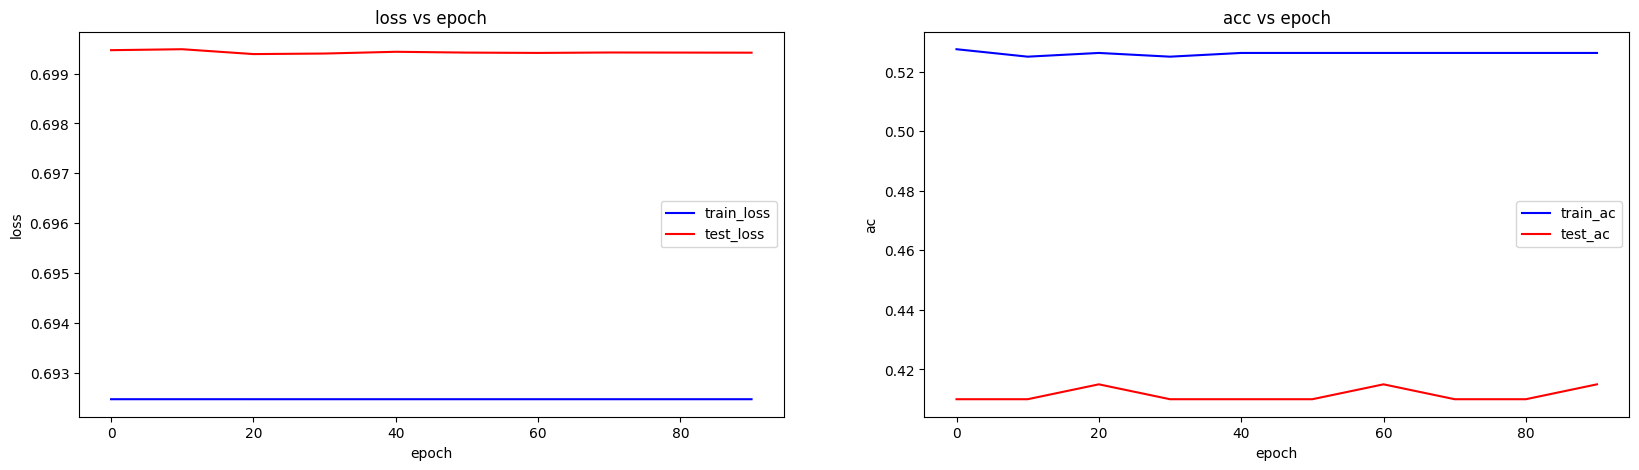

In [214]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(5)
print(test_loss_list)
with torch.inference_mode():
    ax[0].plot(epoch_num, loss_list, c='b', label="train_loss")
    ax[0].plot(epoch_num, test_loss_list, c='r', label="test_loss")
    ax[0].legend()
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel('loss')
    ax[0].set_title('loss vs epoch')
    
    ax[1].plot(epoch_num, train_ac, c='b', label='train_ac')
    ax[1].plot(epoch_num, test_ac, c='r', label='test_ac')
    ax[1].legend()
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('ac')
    ax[1].set_title('acc vs epoch')


In [216]:
#Create data to see if it can fit a strait line

weight = .7
bias = .3

X = torch.arange(0, 1, 0.01)
y = X * .7 +.3

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
len(X_train)

80

## the missing piece non-linearity

In [294]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=.03, random_state=42)
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

In [295]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [296]:
from torch import nn
class logisticRegress2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer1_act = nn.ReLU()
        self.layer2 = nn.Linear(in_features=16, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out1 = self.layer1(x)
        lay1 = self.layer1_act(out1)
        return self.layer2(lay1)

In [297]:
model_03 = logisticRegress2()

In [298]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(lr=.01, params=model_03.parameters())

In [299]:
epochs = 350

epoch_list=[]
loss_list=[]
test_loss_list=[]

train_ac = []
test_ac = []


for epoch in range(epochs):
    model_03.train()
    y_pred_log = model_03(X_train)
    y_pred = torch.round(torch.sigmoid(y_pred_log))
    loss = loss_fn(y_pred_log.squeeze(), y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if epoch % 10 == 0: 
        model_03.eval()
        with torch.inference_mode():
            y_pred_log_test = model_03(X_test)
            y_pred_test = torch.round(torch.sigmoid(y_pred_log_test))

            test_loss = loss_fn(y_pred_log_test.squeeze(), y_test)
            print(f'Epoch {epoch} || Loss {loss} || Test Loss {test_loss}')
            epoch_list.append(epoch)
            loss_list.append(loss)
            test_loss_list.append(test_loss)
            train_ac.append(measure_ac(y_pred, y_train))
            test_ac.append(measure_ac(y_pred_test, y_test))
    

Epoch 0 || Loss 0.6979430317878723 || Test Loss 0.7024246454238892
430
800
101
200
Epoch 10 || Loss 0.6810997128486633 || Test Loss 0.6870288252830505
413
800
105
200
Epoch 20 || Loss 0.668087899684906 || Test Loss 0.6748172044754028
430
800
107
200
Epoch 30 || Loss 0.6524293422698975 || Test Loss 0.662905216217041
469
800
113
200
Epoch 40 || Loss 0.6316937804222107 || Test Loss 0.643354594707489
564
800
139
200
Epoch 50 || Loss 0.6045017838478088 || Test Loss 0.6192936897277832
698
800
169
200
Epoch 60 || Loss 0.5712031722068787 || Test Loss 0.5898386240005493
742
800
178
200
Epoch 70 || Loss 0.5328528881072998 || Test Loss 0.5545517206192017
770
800
184
200
Epoch 80 || Loss 0.4911094605922699 || Test Loss 0.5168650150299072
786
800
190
200
Epoch 90 || Loss 0.44746947288513184 || Test Loss 0.4758239686489105
794
800
194
200
Epoch 100 || Loss 0.40356680750846863 || Test Loss 0.43427154421806335
797
800
199
200
Epoch 110 || Loss 0.3611169159412384 || Test Loss 0.39262667298316956
799
80

[tensor(0.7024), tensor(0.6870), tensor(0.6748), tensor(0.6629), tensor(0.6434), tensor(0.6193), tensor(0.5898), tensor(0.5546), tensor(0.5169), tensor(0.4758), tensor(0.4343), tensor(0.3926), tensor(0.3543), tensor(0.3209), tensor(0.2910), tensor(0.2635), tensor(0.2389), tensor(0.2166), tensor(0.1964), tensor(0.1784), tensor(0.1616), tensor(0.1476), tensor(0.1353), tensor(0.1254), tensor(0.1175), tensor(0.1099), tensor(0.1020), tensor(0.0953), tensor(0.0896), tensor(0.0844), tensor(0.0797), tensor(0.0758), tensor(0.0720), tensor(0.0685), tensor(0.0654)]


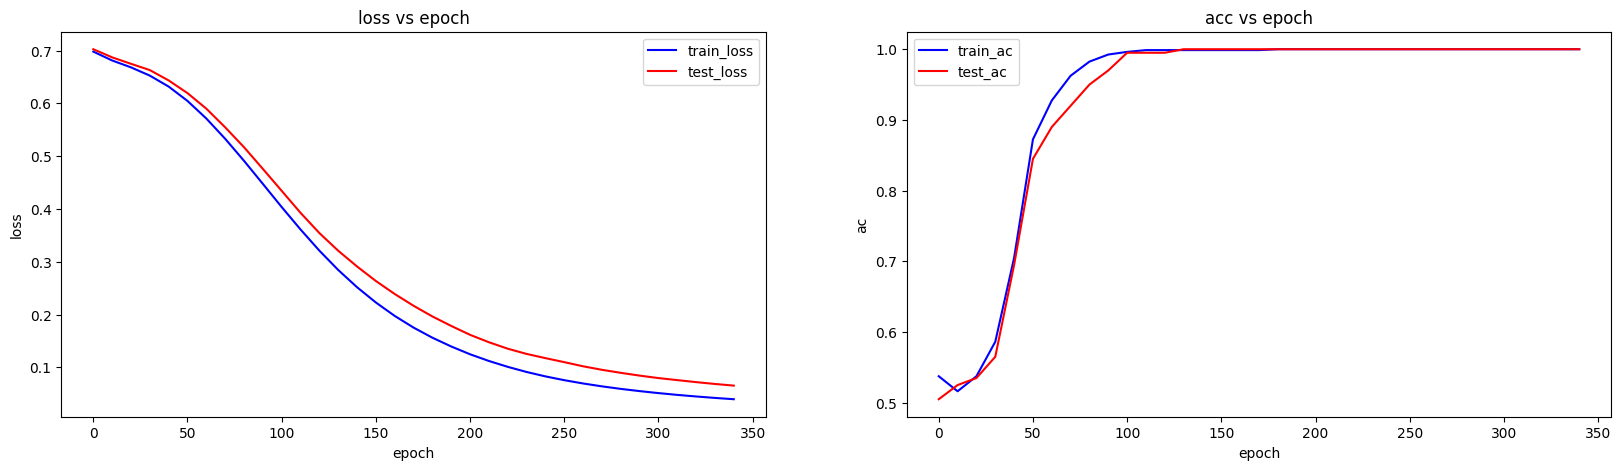

In [300]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(5)
print(test_loss_list)
with torch.inference_mode():
    ax[0].plot(epoch_list, loss_list, c='b', label="train_loss")
    ax[0].plot(epoch_list, test_loss_list, c='r', label="test_loss")
    ax[0].legend()
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel('loss')
    ax[0].set_title('loss vs epoch')
    
    ax[1].plot(epoch_list, train_ac, c='b', label='train_ac')
    ax[1].plot(epoch_list, test_ac, c='r', label='test_ac')
    ax[1].legend()
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('ac')
    ax[1].set_title('acc vs epoch')

## replicating non-linear activation functions 

In [301]:
relX = torch.arange(-10, 10, .5)

In [302]:
relY = torch.relu(relX)

Text(0.5, 1.0, 'relu')

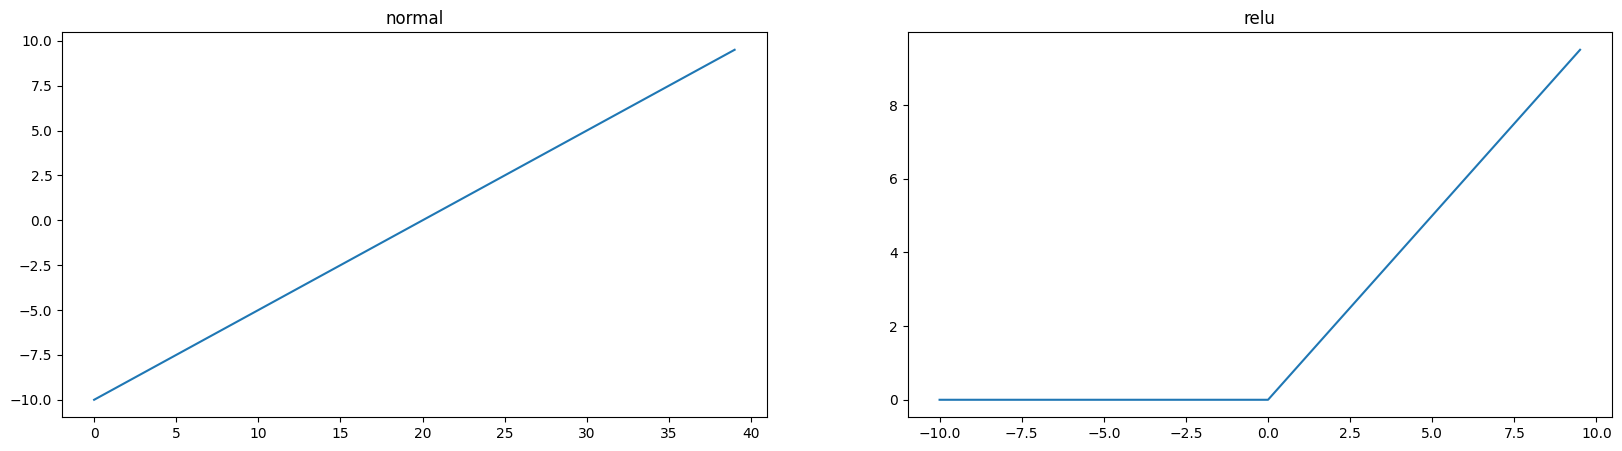

In [306]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(5)

ax[0].plot(relX)
ax[0].set_title('normal')
ax[1].plot(relX, relY)
ax[1].set_title('relu')

## building multiclass classification
more then one thing. compared to binary

In [351]:
import torch
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES,cluster_std=1.5, random_state=RANDOM_SEED)
X_blob, y_blob = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(y_blob).type(torch.long)
X_blob.shape, y_blob.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [352]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=.2, random_state=RANDOM_SEED)
X_blob_test.dtype, y_blob_test.dtype

(torch.float32, torch.int64)

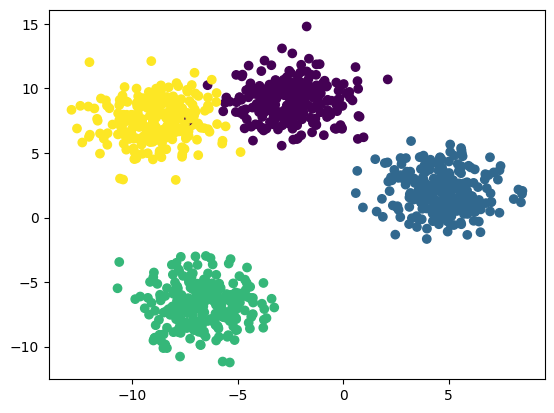

In [397]:
plt.scatter(X_blob[:, 0], X_blob[:,1], c=y_blob)

In [382]:
class MultiClassRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=16)
        self.layer3 = nn.Linear(in_features=16, out_features=4)
        self.relu = nn.ReLU()
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        out1 = self.layer1(x)
        act1 = self.relu(out1)
        out2 = self.layer2(act1)
        act2 = self.relu(out2)
        return self.layer3(act2)

In [389]:
model_04 = MultiClassRegressor()

loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_04.parameters(), lr= .01
                         )

# normalize logits
def findProb(x: torch.Tensor):
    soft = torch.softmax(x, dim=1)
    return soft.argmax(dim=1)


In [390]:
out_test = model_04(X_blob_test)
maxed = findProb(out_test)
maxed, y_blob_test

(tensor([1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
         2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
         1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
         2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
         1, 2, 2, 1, 2, 1, 2, 1]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3,

In [391]:
def measure_ac(y_pred, y_truth):
    #calc correct, sum to get num, item to extract number
    # this would need ot be adjusted so that is deals the logits 
    correct = torch.eq(y_pred.squeeze(), y_truth.squeeze()).sum().item()
    #devide
    return correct/len(y_pred)

In [392]:
epoch_list= []
loss_list = []
loss_test_list=[]
ac_list = []
ac_test_list = []

epochs = 200

for epoch in range(epochs):
    model_04.train()
    y_pred_blob_log = model_04(X_blob_train)
    y_pred_blob = findProb(y_pred_blob_log)
    loss = loss_fn(y_pred_blob_log, y_blob_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if epoch % 10 == 0:
        with torch.inference_mode():
            model_04.eval()
            y_pred_test_blob_log = model_04(X_blob_test)
            y_pred_test_blob = findProb(y_pred_test_blob_log)
            test_loss = loss_fn(y_pred_test_blob_log, y_blob_test)
            epoch_list.append(epoch)
            loss_list.append(loss)
            loss_test_list.append(test_loss)
            
            ac_list.append(measure_ac(y_pred_blob, y_blob_train))
            ac_test_list.append(measure_ac(y_pred_test_blob, y_blob_test))
        
        print(f'epoch {epoch} || loss {loss} || test loss {test_loss}')

        


epoch 0 || loss 1.4204858541488647 || test loss 1.2407487630844116
epoch 10 || loss 0.4916667938232422 || test loss 0.48366686701774597
epoch 20 || loss 0.13249973952770233 || test loss 0.11338753998279572
epoch 30 || loss 0.038700755685567856 || test loss 0.027809953317046165
epoch 40 || loss 0.028077535331249237 || test loss 0.01645682379603386
epoch 50 || loss 0.026139605790376663 || test loss 0.014907347038388252
epoch 60 || loss 0.02546531893312931 || test loss 0.014088381081819534
epoch 70 || loss 0.02496716007590294 || test loss 0.01343541033565998
epoch 80 || loss 0.02460237592458725 || test loss 0.013224905356764793
epoch 90 || loss 0.024268101900815964 || test loss 0.012946945615112782
epoch 100 || loss 0.02394767850637436 || test loss 0.01264300849288702
epoch 110 || loss 0.023630473762750626 || test loss 0.012393997050821781
epoch 120 || loss 0.023318789899349213 || test loss 0.012070653028786182
epoch 130 || loss 0.02301213890314102 || test loss 0.011775911785662174
epoch 

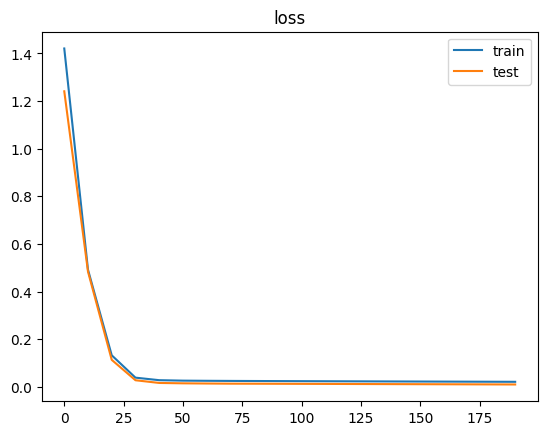

In [393]:
with torch.inference_mode():
    plt.title('loss')
    plt.plot(epoch_list, loss_list, label="train")
    plt.plot(epoch_list, loss_test_list, label='test')
    plt.legend()
    

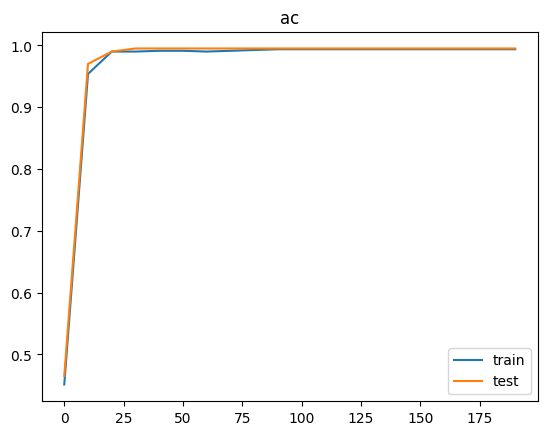

In [394]:
with torch.inference_mode():
    plt.title('ac')
    plt.plot(epoch_list, ac_list, label="train")
    plt.plot(epoch_list, ac_test_list, label='test')
    plt.legend()

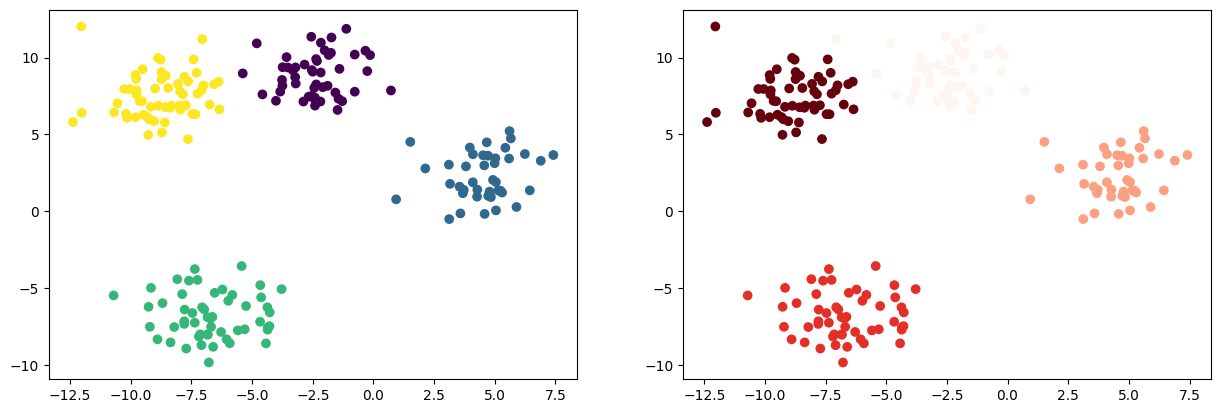

In [408]:
# plot pred vs labels

plot_logits = model_04(X_blob_test)
plot_y = findProb(plot_logits)

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
ax[0].scatter(X_blob_test[:, 0], X_blob_test[:,1], c=y_blob_test)
ax[1].scatter(X_blob_test[:, 0], X_blob_test[:,1], c=plot_y, cmap="Reds")

## classification metrics

- Acc out of x how many does it get right
- precistion 
- recall
- f1 score

In [411]:
from torchmetrics import Accuracy

In [414]:
calc_ac = Accuracy(task='multiclass', num_classes=4)
calc_ac(y_blob_test, plot_y)

tensor(0.9950)